In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_excel('demand_jan_maio.xlsx')
dataset_train.head()


,Consumption,next 8 hour
0,56443,43926.143750
1,51642,43902.985417
2,51757,43891.245833
3,51521,43879.418750
4,51295,43867.204167


In [3]:
training_set = dataset_train.iloc[:, 0:1].values


In [4]:
dataset_train.shape

(217440, 2)

In [5]:
dataset_train.head()


,Consumption,next 8 hour
0,56443,43926.143750
1,51642,43902.985417
2,51757,43891.245833
3,51521,43879.418750
4,51295,43867.204167


In [6]:
training_set

array([[56443],
       [51642],
       [51757],
       ...,
       [56765],
       [54835],
       [54475]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set[:100000])

In [8]:
3 * 480

1440

In [9]:
minutesAgoUpperBound = 1440
minutesAgoLowerBound = 1540

featureSize = minutesAgoLowerBound - minutesAgoUpperBound

minutespredict = 480
X_train = []
y_train = []
for i in range(minutesAgoLowerBound, 100000 - minutespredict):
    X_train.append(training_set_scaled[i - minutesAgoLowerBound:i-minutesAgoUpperBound, 0])
    y_train.append([training_set_scaled[i + x, 0] for x in range(minutespredict)])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(97980, 100, 1)

In [10]:
y_train.shape

(97980, 480)

In [11]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense

2022-07-15 17:38:29.371358: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 17:38:29.371373: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [12]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=minutespredict))
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

2022-07-15 17:38:30.123338: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-15 17:38:30.123365: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-15 17:38:30.123382: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a-ZenBook): /proc/driver/nvidia/version does not exist
2022-07-15 17:38:30.123636: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [13]:
model.fit(X_train,y_train,epochs=100, batch_size=1000)

Epoch 1/100
98/98 [==============================] - 63s 616ms/step - loss: 0.0298
Epoch 2/100
98/98 [==============================] - 61s 624ms/step - loss: 0.0211
Epoch 3/100
98/98 [==============================] - 61s 624ms/step - loss: 0.0196
Epoch 4/100
98/98 [==============================] - 61s 623ms/step - loss: 0.0191
Epoch 5/100
98/98 [==============================] - 62s 628ms/step - loss: 0.0185
Epoch 6/100
98/98 [==============================] - 67s 683ms/step - loss: 0.0181
Epoch 7/100
98/98 [==============================] - 62s 636ms/step - loss: 0.0181
Epoch 8/100
98/98 [==============================] - 63s 639ms/step - loss: 0.0176
Epoch 9/100
98/98 [==============================] - 62s 635ms/step - loss: 0.0175
Epoch 10/100
98/98 [==============================] - 63s 643ms/step - loss: 0.0173
Epoch 11/100
98/98 [==============================] - 64s 651ms/step - loss: 0.0171
Epoch 12/100
98/98 [==============================] - 63s 640ms/step - loss: 0.0171
E

98/98 [==============================] - 61s 625ms/step - loss: 0.0048
Epoch 99/100
98/98 [==============================] - 61s 625ms/step - loss: 0.0047
Epoch 100/100
98/98 [==============================] - 61s 626ms/step - loss: 0.0048


In [14]:
# url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/tatatest.csv'
# dataset_test = pd.read_csv(url)
# real_stock_price = dataset_test.iloc[:, 1:2].values
real_Consumption = training_set[100000:100000 + minutesAgoUpperBound]


In [15]:
# minutespredict = 480
# minutesAgo = 100

In [16]:
# dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# inputs = dataset_train[len(dataset_total) - len(dataset_test) - 60:].values
inputs = training_set[100000 - minutesAgoLowerBound:]
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(minutesAgoLowerBound, 2 * minutesAgoUpperBound):
    X_test.append(inputs[i-minutesAgoLowerBound:i-minutesAgoUpperBound, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [17]:
predicted_Consumption = model.predict(X_test)
# predicted_Consumption = sc.inverse_transform(predicted_Consumption)

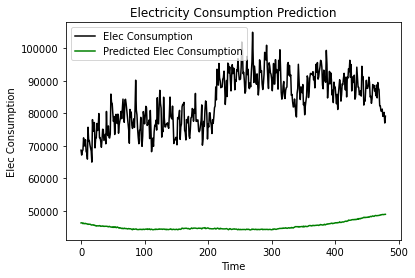

In [35]:
plt.plot(real_Consumption[:480], color = 'black', label = 'Elec Consumption')
plt.plot(sc.inverse_transform(predicted_Consumption)[0], color = 'green', label = 'Predicted Elec Consumption')
plt.title('Electricity Consumption Prediction')
plt.xlabel('Time')
plt.ylabel('Elec Consumption')
plt.legend()
plt.show()